<h1 style="font-size: 32px; text-align: center;">Introduction to Computer Programming for the Physical Sciences</h1>
<h2 style="font-size: 24px; text-align: center;">Diego Gonzalez Hernandez</h2>
<h3 style="font-size: 24px; text-align: center;">Winter 2025</h2>

## Working on Section Problems

<ul style="list-style: none;">
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Get into groups of 2 or 3, with at least one laptop per group.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Discuss with each other and attempt each problem yourselves first without AI support for 10-15 mins.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;">
</span>Input the problem prompt into the AI chatbox, use its answer to verify your own, or to learn how it should be solved.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;">
</span>For section problems, you can omit most of the commenting and focus on learning coding. For more difficult problems, minimal comments are still recommended as a way of organizing your own thoughts.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Please abide by the <b><a href="https://github.com/enigma-igm/Phys29/blob/main/using_AI_tools.md">Policy and Guidelines on Using AI Tools</a></b></li>

# Section 6

## Anonymous Poll

### Please first complete this anonymous poll for us to get an idea of how long the homework is taking everyone:
https://forms.gle/U5kUu3c8JMuoBWFJ6

## Problem 1

The sinc function,
\begin{equation}
  sinc(x) =
    \begin{cases}
      \frac{sin(x)}{x} & x\neq 0\\
      1 & x = 0
    \end{cases}       
\end{equation}
shows up frequently in signal processing. One of the important applications of this function in physics is that the intensity pattern of (Fraunhofer) single slit diffraction is given by 
\begin{align}
I(\alpha) &= I_0 sinc^2(\alpha) \tag{1}\\
\end{align}
where $\alpha = (\frac{\pi a}{\lambda}) sin\theta$, a is the slit width, $\lambda$ is the wavelength of light, $\theta$ is the angle that the light makes with the perpendicular direction to the screen, and $I_0$ is the intensity in the direction perpendicular to the screen.

(a) Set $I_0 = 1$, make a plot of the intensity distribution as a function of the parameter $\alpha$, for $−10 \leq \alpha \leq 10$. You can do this by either defining your own sinc function, or using ```np.sinc(alpha/np.pi)``` (note that there is a $\pi$ in the denominator if you use numpy, since it follows a different convention).

(b) The maxima are given by the roots of the following equation:
$$f(\alpha) = \alpha cos(\alpha) - sin(\alpha) = 0 \tag{2}$$
Using either bracketing and bisection, or Newton-Raphson, calculate the lowest $\textbf{positive}$ value of $\alpha$ that give rise to a maximum in the intensity pattern. Plot these locations as points on your graph of the intensity pattern.

In [1]:
# your solution here

# hint for part b: 
# 1. Read the lecture notes on root finding, you can use the complete code in the notes for both bisection and Newton's method.
# 2. To find the smallest positive root of equation (2), look at the plot you made for equation (1), and use a good initial guess.
# 3. You do NOT need to plot equation (2), that is only used to find the maximum. Once you find the root, alpha0, you need to plot
#    (alpha0, I(alpha0)) as a single point on top of the plot for equation (1).

In [2]:

import numpy as np
        
# Create a function for equation 1
def intensity(alpha, I0=1):
    
    return I0 * np.sinc(alpha/np.pi)**2
    

In [3]:

# Create a range of alpha values
alphas = np.linspace(-10,10,10001)

# Find the corresponding intensity values
intensities = intensity(alphas)


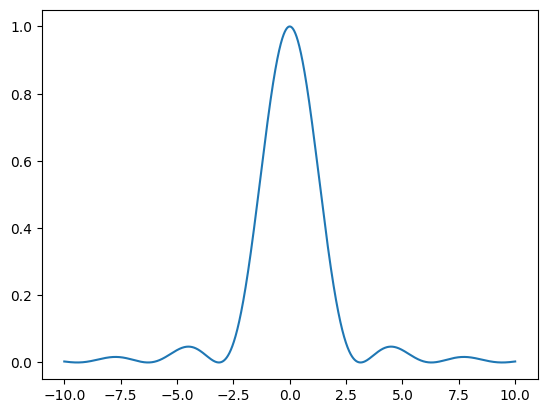

In [4]:

# Plot intensity vs alpha
import matplotlib.pyplot as plt
plt.plot(alphas,intensities)
plt.show()


In [5]:

# Root finding functions from Lecture Notes

def bisection(func, a, b, tol=1e-4, max_iter=100, verbose=False):
    """
    Find a root x of the equation func(x)=0 within an interval [a, b] using the bisection method.

    Parameters
    ----------
    func : callable
        The function for which to find the root. 
    a : float
        The lower bound of the interval.
    b : float
        The upper bound of the interval.
    tol : float, optional
        The absolute tolerance for the root. The function returns when the size of the bisection interval is less than tol. Default is 1e-4. 
    max_iter : int, optional
        The maximum number of iterations. Default is 100.

    Returns
    -------
    root: float
        The root of the function.

    Raises
    ------
    ValueError
        If a is not less than b.
    ValueError
        If f(a) and f(b) have the same sign.
    ValueError
        If the function does not converge within max_iter iterations.
    """
    # Do some error checking
    if not a < b:
        raise ValueError("a must be less than b")
    if func(a) * func(b) > 0:
        raise ValueError("f(a) and f(b) must have different signs")

    for iter in range(max_iter):
        # bisect, x is the new candidate root
        x = (a + b) / 2
        if verbose:
            # Print the current values of a, root, and b
            print(f"iteration: {iter + 1:3d}, a: {a:.6f}, root: {x:.6f}, b: {b:.6f}, eps: {(b - a)/2:.6f}")
        # Check if we found the zero or if the localization interval (b-a)/2 = (x-a) = (b-x) 
        # is within the tolerance.
        if func(x) == 0.0 or (b - a)/2 < tol:
            break
        # If the signs of f(x) and f(a) are different then the root is between a and x, update b
        if func(x) * func(a) < 0:
            b = x
        # Otherwise if the sign of f(a) and f(x) are the same, the root is between x and b, update a
        else:
            a = x
    else:
        # If the loop completes without a break, enter the else and raise an error.
        raise ValueError(f"The localization interval = {b-a/2} > {tol} = tolerance after max_iter = {max_iter} iterations\n" + 
                         f"Increase the value of max_iter. ")
    return x

In [6]:

def deriv(func, x, h=1e-4):
    """
    Compute the nth derivative of a function f(x) using the symmetric difference formula.

    Parameters
    ----------
    func : callable 
        Function to take the derivative of.
    x : float or array_like
        Location(s) at which to evaluate the derivative.
    h : float, optional
        Step size. The default is 1e-4.

    Returns
    -------
    df/dx(x): float or array_like
        The derivative of f(x) evaluated at x. shape is same as x. 

    """
    return (func(x + h) - func(x - h))/(2*h)


def newton_raphson(func, x0, fprime=None, tol=1e-4, h=1e-4, max_iter=100, verbose=False):
    """
    Find a root x of the equation func(x)=0 with derivative df(x) using the Newton-Raphson method.

    Parameters
    ----------
    func : callable
        The function for which to find the root.
    x0 : float
        The initial guess for the root.
    fprime : callable, optional 
        The derivative of the function. Default is None, in which case the derivative will be computed numerically.  
    tol : float, optional
        The absolute tolerance for the root. The function returns when the absolute value of the difference 
        between the current and previous root is less than tol. Default is 1e-5.
    h : float, optional
        Step size if the derivative is to be computed numerically. The default is 1e-4.
    max_iter : int, optional
        The maximum number of iterations. Default is 100.
    verbose : bool, optional
        If True, print the iteration process. Default is False.

    Returns
    -------
    float
        The root of the function.

    Raises
    ------
    ValueError
        If the function does not converge within max_iter iterations.
    """
    # Initialize the current guess for the root
    x = x0

    # Perform the Newton-Raphson iteration
    for iter in range(max_iter):
        # Calculate the function value and its derivative at the current guess
        f = func(x)
        # Use the analytical derivative function if provided, otherweise use the numerical derivative
        dfx = fprime(x) if fprime is not None else deriv(func, x, h=h)

        # Update the guess using the Newton-Raphson formula
        prev_x = x
        x = x - f/dfx

        if verbose:
            # Print the current iteration, root, and absolute difference between the current and previous root
            print(f"iteration: {iter + 1}, current root: {x:.12f}, previous root: {prev_x:.12f}, |difference|: {np.abs(x - prev_x):.12f}")

        # If the absolute difference between the current and previous root is less than the tolerance, the root has been found
        if np.abs(x - prev_x) < tol:
            break 
    else: 
        # If the function did not break out after max_iter iterations we enter elese. Since it did not converge. Raise an exception. 
        raise ValueError(f"The absolute difference between the current and previous root = {abs(x - prev_x)} > {tol} = tolerance after max_iter = {max_iter} iterations\n" + 
                         f"Increase the value of max_iter or changing the initial guess.")
    
    return x


In [7]:

# Create a function for equation 2
def roots(a):
    return a*np.cos(a) - np.sin(a)

# Using both of the functions from the Week 6 Lecture Notes
root = bisection(roots, 3.0, 6.0) # Initial Boundaries
print(root)
root = newton_raphson(roots, 4.0) # Initial Guess
print(root)

4.493499755859375
4.493409457909528


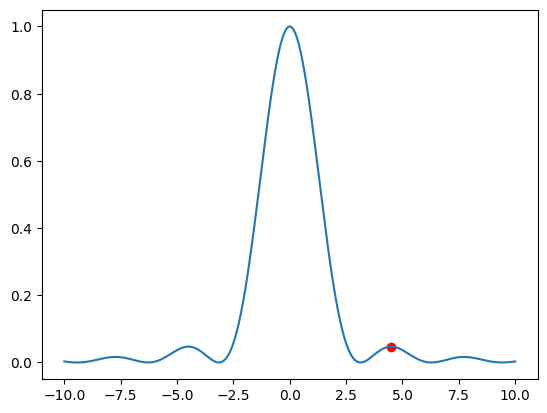

In [8]:

plt.plot(alphas, intensities)
plt.scatter(root, intensity(root), c='red')
plt.show()


## Problem 2

The Gaussian distribution:
\begin{equation}
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} exp(-\frac{(x - \mu)^2}{2σ^2})
\end{equation}
is probably the most famous statistical distribution. It shows up in a huge range of problems, and you will probably end up using it when analyzing your lab results (even if you don’t realize it). The Gaussian distribution is normalized such that 
$$\int^{\infty}_{-\infty}p(x)dx = 1 $$
and $p(x) dx$ is the infinitesimal probability that a single measurement lies in the interval (x, x + dx), if the underlying quantity you are measuring follows the Gaussian distribution.
Set $\mu = 0$ and $\sigma = 1$. What is the total probability with $−3 < x < 3$? 

In other words, please compute 
$$\int^{3}_{-3}p(x) dx$$ 

Please use a numerical integration scheme of your choice to get a precision of $10^{-6}$. To measure your precision, you can get the exact answer with ```scipy.special.erf(3/np.sqrt(2))```.

In [9]:
# your solution here

# hint: again, you can refer to the lecture notes on the numerical integration schemes

In [10]:

# Create a function for the gaussian distribution
def gaussian(x, mu=0, sig=1):
    
    coeff = 1/np.sqrt(2*np.pi*sig**2)
    exp_term = np.exp(-(x-mu)**2 / (2*sig**2))
    
    return coeff * exp_term


In [11]:

# Use integration functions from Lecture Notes

def midpoint_riemann_sum(func, a, b, n, plot=True):
    """
    Compute the Riemann sum of func(x) over the interval [a, b] with n subintervals using the midpoint rule.

    Parameters
    ----------
    func : callable 
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    n : int, optional
        The number of subintervals to use.
    plot : bool, optional
        If True, plot the function func(x) over the interval [a, b] as well as the rectangles 
        used to compute the Riemann sum. Default is True.

    Returns
    -------
    answer : float
        The estimate of the integral of func(x) over the interval [a, b].

    """

    # Create the partition of the interval [a, b]
    x = np.linspace(a, b, n+1)
    dx = (b - a) / n

    # Compute the value of the function at the midpoint of each subinterval
    x_mid = (x[:-1] + x[1:]) / 2
    y_mid = func(x_mid)

    # Compute the area of each rectangle
    area = dx * y_mid

    # Compute the Riemann sum
    answer = np.sum(area)

    # Plot the function and the rectangles. Generate a red point at the midpoint location
    if plot:
        plot_riemann_sum(func, a, b, x_mid, y_mid, dx, 'midpoint', 'Midpoint Riemann sum, n = {}'.format(n))

    return answer


In [12]:

from matplotlib.ticker import AutoMinorLocator

def plot_riemann_sum(func, a, b, x, y, dx, kind, title, nfine=1000):
    """ Plotting utility function for Riemann sums

    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    x : array_like
        The x-coordinates of the evaluation point of the subintervals.
    y : array_like
        The y-coordinates of the evaluation point of the subintervals.
    dx : float
        The width of the subintervals.
    kind: str
        The kind of Riemann sum to plot. Must be either 'left', 'right', or 'midpoint'.
    title : str
        The title of the plot.
    nfine : int, optional
        The number of fine points to plot the function with. Default is 1000.
    """

    # For plotting the curve evaluate on a finely spaced set of points. 
    x_fine = np.linspace(a, b, nfine)
    plt.plot(x_fine, func(x_fine), 'b', label='f(x)')
    plt.plot(x, y, 'ro', label='Evaluation Points')
    plt.title(title)
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    if kind == 'left' or kind == 'right':        
        plt.bar(x, y, width=dx, alpha=0.8, facecolor='orange', edgecolor='k', align='edge', label='Rectangles')
    else: 
        plt.bar(x, y, width=dx, alpha=0.8, facecolor='orange', edgecolor='k', align='center', label='Rectangles')

    # Set approximately 5 minor ticks on x-axis and y-axis
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator(5))
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator(5))

    # Add ticks on the top and right axes
    plt.gca().tick_params(which='both', top=True, right=True)

    plt.legend(loc='best')
    

In [13]:

from scipy.special import erf # Import Error Function to find exact answer

tol = 1e-6 # Set desired tolerance
ans = erf(3/np.sqrt(2)) # Find Expected Answer
error = 1 # Set Initial Error
n = 50 # Set initial subinterval value

while error > tol: # While the error is too high, proceed through loop
    n *= 2 # Increase number of subintervals
    result = midpoint_riemann_sum(gaussian, -3, 3, n, plot=False) # Find the new integrated value
    error = np.abs(result - ans) # Find the new error
    
print(n)
print(result, ans)

200
0.9973012009455826 0.9973002039367398


In [14]:

# Compare use of scipy quad function

from scipy.integrate import quad

print(quad(gaussian,-3,3)[0], ans)


0.9973002039367399 0.9973002039367398
